In [11]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# ✅ Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Improve plot appearance
sns.set(style="whitegrid")

print("Libraries imported successfully ✅")


Libraries imported successfully ✅


In [2]:
# 📂 Upload the student data CSV file

from google.colab import files
uploaded = files.upload()


Saving student_data.csv to student_data.csv


In [3]:
# 📄 Load the uploaded CSV into a pandas DataFrame

import io

# Automatically read the first uploaded file
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# 🔍 Preview the data
st_rows, st_cols = df.shape
print(f"✅ Dataset loaded successfully with {st_rows} rows and {st_cols} columns.")
df.head()


✅ Dataset loaded successfully with 10 rows and 6 columns.


,Name,Maths,Science,English,Attendance (%),Login Count
0,Ravi,85,78,88,90,30
1,Sita,45,50,48,60,15
2,Amit,70,72,68,80,22
3,Geeta,92,89,95,95,35
4,Mohan,55,60,58,65,18


In [4]:
# 🧹 Data Cleaning & Feature Engineering

# 1. Show column names to confirm structure
print("📋 Column Names in Dataset:")
print(df.columns.tolist())

# 2. Check for missing/null values
print("\n❓ Missing Values in Each Column:")
print(df.isnull().sum())

# 3. Fill or drop missing values if necessary
# (Uncomment if needed)
# df = df.dropna()
# OR
# df.fillna(method='ffill', inplace=True)

# 4. Calculate average marks across subjects
df['Average Marks'] = df[['Maths', 'Science', 'English']].mean(axis=1)

# 5. Confirm new column
print("\n✅ 'Average Marks' added successfully!")
df[['Name', 'Maths', 'Science', 'English', 'Average Marks']].head()


📋 Column Names in Dataset:
['Name', 'Maths', 'Science', 'English', 'Attendance (%)', 'Login Count']

❓ Missing Values in Each Column:
Name              0
Maths             0
Science           0
English           0
Attendance (%)    0
Login Count       0
dtype: int64

✅ 'Average Marks' added successfully!


,Name,Maths,Science,English,Average Marks
0,Ravi,85,78,88,83.666667
1,Sita,45,50,48,47.666667
2,Amit,70,72,68,70.000000
3,Geeta,92,89,95,92.000000
4,Mohan,55,60,58,57.666667


/tmp/ipython-input-5-4264593912.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Average Marks', data=df, palette='viridis')
/tmp/ipython-input-5-4264593912.py:17: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


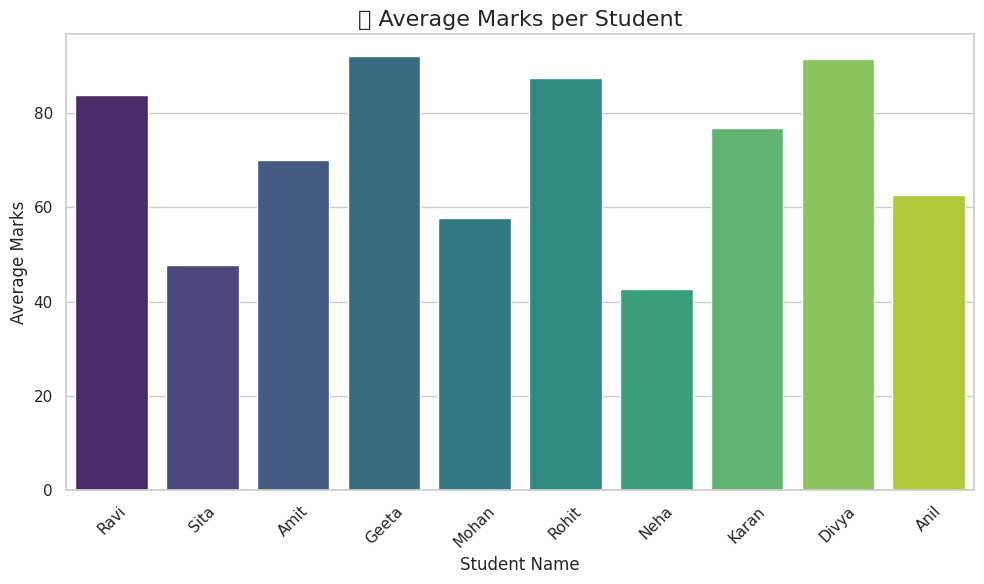

In [5]:
# 📊 Bar Chart of Average Marks per Student

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Average Marks', data=df, palette='viridis')

# Add titles and rotate labels
plt.title("📚 Average Marks per Student", fontsize=16)
plt.xlabel("Student Name")
plt.ylabel("Average Marks")
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-1543638946.py:13: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


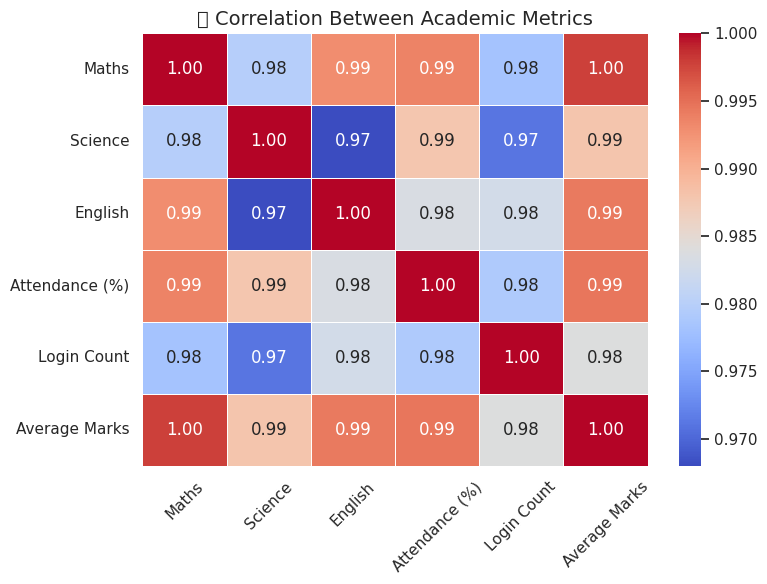

In [6]:
# 📌 Correlation Heatmap – Marks, Attendance, Logins

# Calculate the correlation matrix
corr_matrix = df[['Maths', 'Science', 'English', 'Attendance (%)', 'Login Count', 'Average Marks']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("🔥 Correlation Between Academic Metrics", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [7]:
# 🏅 Top vs Struggling Students – Based on Average Marks

# Set performance threshold (e.g., 60%)
pass_mark = 60

# Sort by average marks
sorted_df = df.sort_values(by='Average Marks', ascending=False)

# Top 3 performers
top_students = sorted_df.head(3)

# Bottom 3 performers (or those below threshold)
struggling_students = df[df['Average Marks'] < pass_mark].sort_values(by='Average Marks')

# 📋 Display Results
print("✅ Top 3 Performing Students:\n")
print(top_students[['Name', 'Average Marks']])

print("\n⚠️ Students Needing Academic Support:\n")
print(struggling_students[['Name', 'Average Marks']])


✅ Top 3 Performing Students:

    Name  Average Marks
3  Geeta      92.000000
8  Divya      91.333333
5  Rohit      87.333333

⚠️ Students Needing Academic Support:

    Name  Average Marks
6   Neha      42.666667
1   Sita      47.666667
4  Mohan      57.666667


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


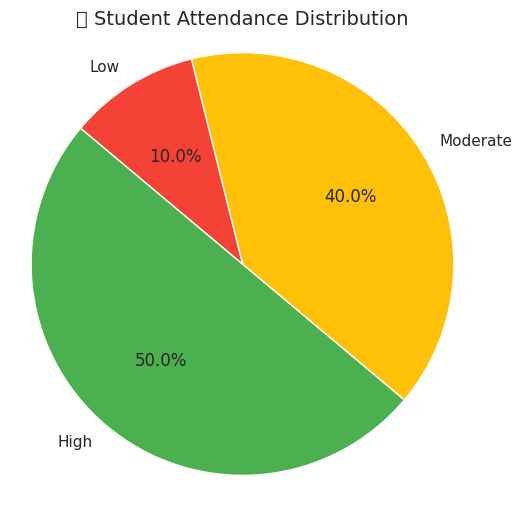

In [8]:
# 🧮 Categorize students based on attendance percentage
def attendance_level(x):
    if x >= 85:
        return 'High'
    elif x >= 60:
        return 'Moderate'
    else:
        return 'Low'

df['Attendance Level'] = df['Attendance (%)'].apply(attendance_level)

# 📊 Pie chart
attendance_counts = df['Attendance Level'].value_counts()

plt.figure(figsize=(6, 6))
colors = ['#4CAF50', '#FFC107', '#F44336']  # Green, Yellow, Red
plt.pie(attendance_counts, labels=attendance_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("📌 Student Attendance Distribution", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures a circle.
plt.show()


/tmp/ipython-input-9-1055786386.py:9: UserWarning: Glyph 128229 (\N{INBOX TRAY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128229 (\N{INBOX TRAY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


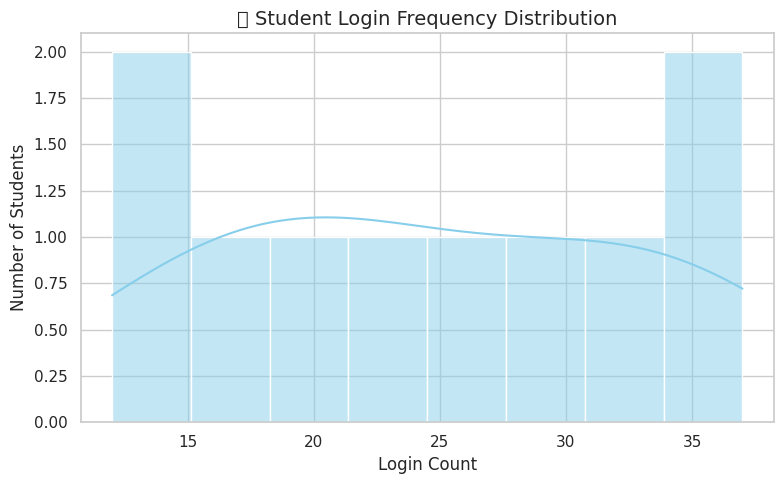

In [9]:
# 📈 Distribution of Login Counts

plt.figure(figsize=(8, 5))
sns.histplot(df['Login Count'], bins=8, kde=True, color='skyblue')
plt.title("📥 Student Login Frequency Distribution", fontsize=14)
plt.xlabel("Login Count")
plt.ylabel("Number of Students")
plt.grid(True)
plt.tight_layout()
plt.show()


# ✅ Final Insights & Recommendations

### 🔍 Summary of Findings:

- 📊 **Top performers** have average marks above 85% and high attendance.
- ⚠️ **Struggling students** tend to have both **low attendance** and **lower login activity**.
- 🔥 **Correlation analysis** revealed a positive relationship between:
  - **Attendance and Marks**
  - **Login Count and Marks** (in some cases)

### 📌 Recommendations:

- Students with low attendance or login activity may benefit from academic support or mentoring.
- Early intervention based on analytics can help reduce dropout risk.
- Teachers/admins can monitor performance using this dashboard monthly or semester-wise.

---

## 📁 Project Submission Checklist:

- ✅ All 9 notebook cells completed
- ✅ Sample dataset uploaded (`student_data.csv`)
- ✅ Code commented and logically structured
- ✅ Visuals include bar chart, heatmap, pie chart, histogram
- ✅ Final analysis written in clear, professional style

---



**🧠 Built with Python, visualized with care, and submitted with purpose.**

